In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [93]:
df = pd.read_csv('PlayTennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [94]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [96]:
df1 = df.copy()

In [97]:
df['windy'] = df['windy'].apply(lambda x: 'strong' if x == True else 'weak')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [98]:
def outlook_int(name):
    if name == 'sunny':
        return 0
    elif name == 'overcast':
        return 1
    else:
        return 2

def temp_int(name):
    if name == 'hot':
        return 0
    elif name == 'mild':
        return 1
    else:
        return 2

def humid_int(name):
    if name == 'normal':
        return 0
    else:
        return 1

def windy_int(name):
    if name == 'weak':
        return 0
    else:
        return 1
    
def play_int(name):
    if name == 'yes':
        return 1
    else:
        return 0

In [99]:
df['outlook'] = df['outlook'].apply(lambda x: outlook_int(x))
df['temp'] = df['temp'].apply(lambda x: temp_int(x))
df['humidity'] = df['humidity'].apply(lambda x: humid_int(x))
df['windy'] = df['windy'].apply(lambda x: windy_int(x))
df['play'] = df['play'].apply(lambda x: play_int(x))

In [100]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [101]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test).ravel()
accuracy_score(Y_test,Y_pred)

0.3333333333333333

In [102]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6666666666666666

In [103]:
clf.criterion

'gini'

In [104]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6666666666666666

In [105]:
clf = DecisionTreeClassifier(criterion='log_loss')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6666666666666666

In [106]:
clf = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=0.1)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6666666666666666

In [107]:
clf.__dict__

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.1,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['outlook', 'temp', 'humidity', 'windy'], dtype=object),
 'n_features_in_': 4,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 4,
 'tree_': <sklearn.tree._tree.Tree at 0x7f3dd9707f30>}

In [108]:
clf.get_n_leaves()

6

In [109]:
from sklearn.tree import export_graphviz
import graphviz

## Plotting the graph using Graphviz

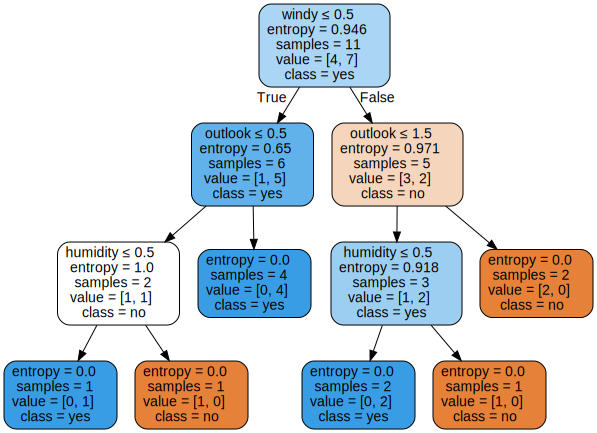

In [110]:
data = export_graphviz(clf,out_file=None)
graph = graphviz.Source(data)
graph.render("iris")

data = export_graphviz(clf,out_file=None,feature_names=['outlook','temp','humidity','windy'],class_names=['no','yes'],filled=True,rounded=True,special_characters=True)

graph = graphviz.Source(data)
graph